In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-v0_8')

In [2]:
f = lambda x: x**2
h = 1e-6

In [3]:
x = np.linspace(-6,6, 100)

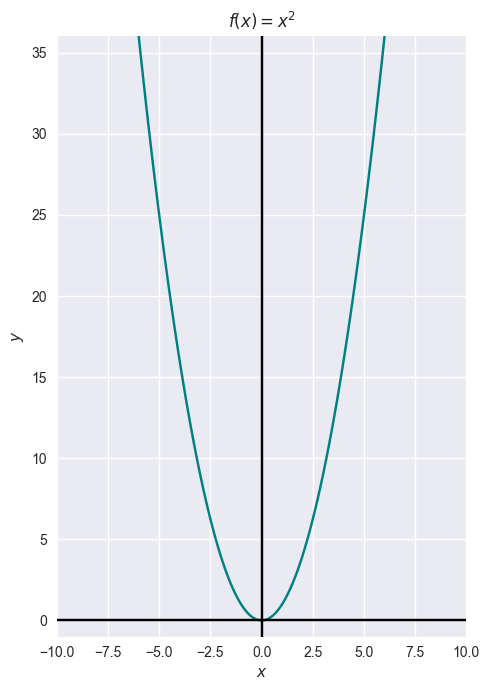

In [4]:
fig, ax = plt.subplots(figsize = (5,7))
ax.plot(x,f(x), color = 'teal')
ax.axvline(c = 'black')
ax.axhline(c = 'black')
ax.set_xlim(-10,10)
ax.set_ylim(-1,36)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('$f(x)=x^2$')
plt.tight_layout()
plt.show()
fig.savefig('./images/x2_func.png')

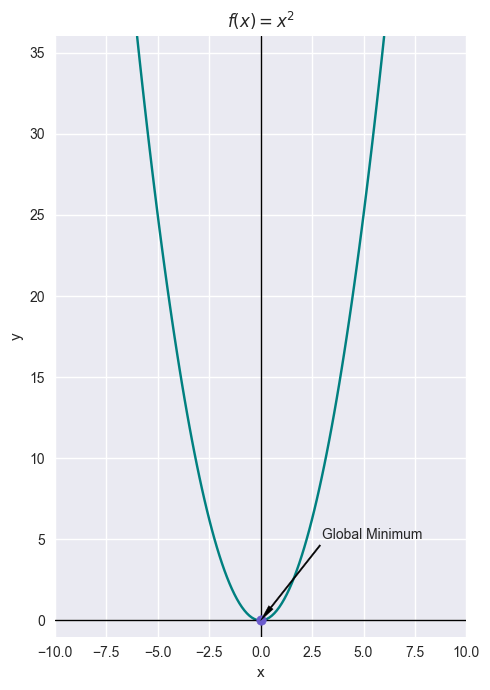

In [5]:
fig, ax = plt.subplots(figsize=(5,7))
ax.plot(x,f(x), color = 'teal')
ax.scatter(0,f(0), color = 'slateblue', zorder = 3)
ax.annotate('Global Minimum', xy = (0, 0), xytext = (3,5), arrowprops = dict(width = 1, headwidth = 4, facecolor = 'black'))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$f(x)=x^2$')
ax.axvline(color='black', linewidth = 1)
ax.axhline(color='black', linewidth = 1)
ax.set_xlim(-10,10)
ax.set_ylim(-1,36)
plt.tight_layout()
plt.show()
fig.savefig('./images/gob_min.png')

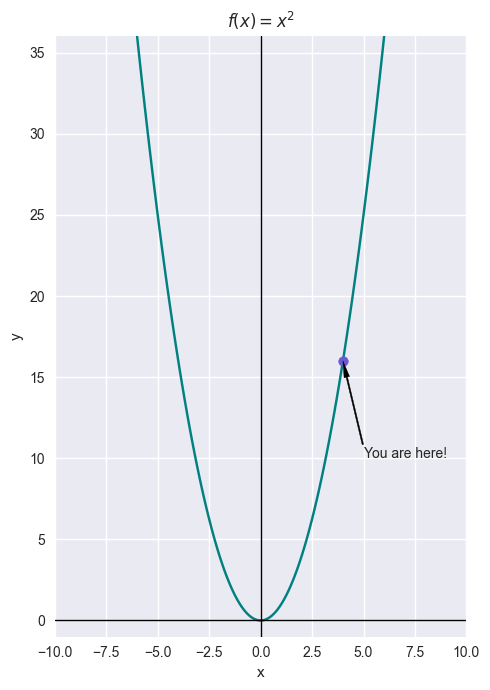

In [6]:
fig, ax = plt.subplots(figsize=(5,7))
ax.plot(x,f(x), color = 'teal')
ax.scatter(4,f(4), color = 'slateblue', zorder = 3)
ax.annotate('You are here!', xy = (4, 16), xytext = (5, 10), arrowprops = dict(width = 1, headwidth = 4, facecolor = 'black'))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$f(x)=x^2$')
ax.axvline(color='black', linewidth = 1)
ax.axhline(color='black', linewidth = 1)
ax.set_xlim(-10,10)
ax.set_ylim(-1,36)
plt.tight_layout()
plt.show()
fig.savefig('./images/de_grad.png')

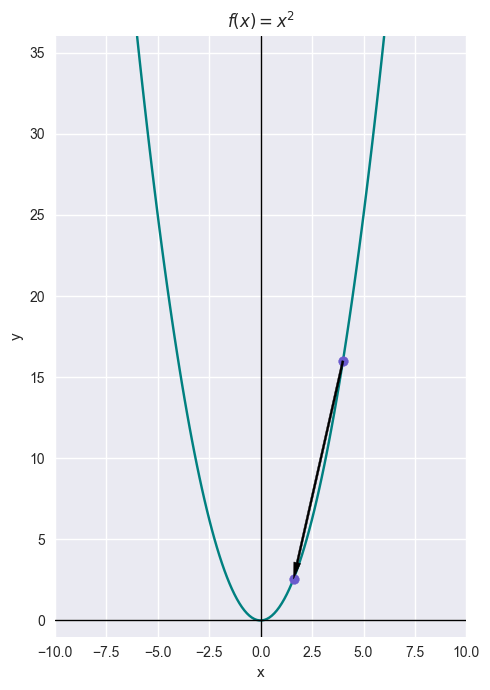

In [7]:
fig, ax = plt.subplots(figsize=(5,7))
ax.plot(x,f(x), color = 'teal')
ax.scatter([4,1.6],[f(4),f(1.6)], color = 'slateblue', zorder = 3)
ax.annotate('', xy = (1.6, f(1.6)), xytext = (4, f(4)), arrowprops = dict(width = 1.5, headwidth = 5, facecolor = 'black'))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$f(x)=x^2$')
ax.axvline(color='black', linewidth = 1)
ax.axhline(color='black', linewidth = 1)
ax.set_xlim(-10,10)
ax.set_ylim(-1,36)
plt.tight_layout()
plt.show()
fig.savefig('./images/de_grad_step1.png')

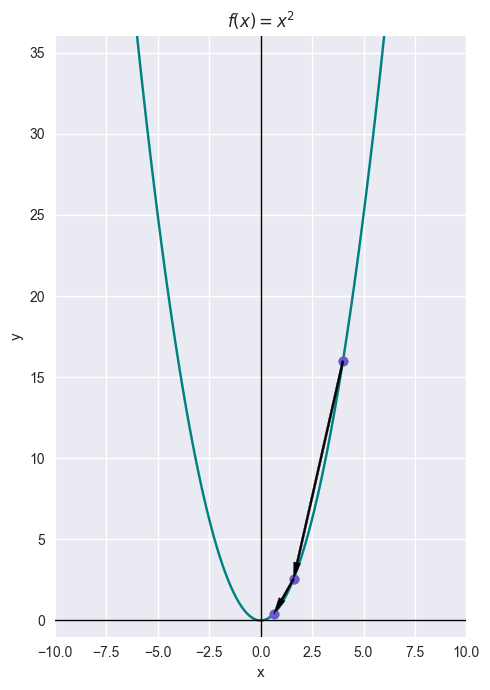

In [8]:
fig, ax = plt.subplots(figsize=(5,7))
ax.plot(x,f(x), color = 'teal')
ax.scatter([4, 1.6, 0.64],[f(4), f(1.6), f(0.64)], color = 'slateblue', zorder = 3)
ax.annotate('', xy = (1.6, f(1.6)), xytext = (4, f(4)), arrowprops = dict(width = 1.5, headwidth = 5, facecolor = 'black'))
ax.annotate('', xy = (0.64, f(0.64)), xytext = (1.6, f(1.6)), arrowprops = dict(width = 1.5, headwidth = 5, facecolor = 'black'))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$f(x)=x^2$')
ax.axvline(color='black', linewidth = 1)
ax.axhline(color='black', linewidth = 1)
ax.set_xlim(-10,10)
ax.set_ylim(-1,36)
plt.tight_layout()
plt.show()
fig.savefig('./images/de_grad_step2.png')

In [9]:
def gradient_descent(x_i, f, epochs, eta):
    df = lambda x : 2 * x
    x_n = x_i
    x_ = []
    m_ = []
    x_.append(x_n)
    m_.append(df(x_n))
    for i in range(epochs):
        grad = df(x_n)
        x_n = x_n - eta * grad
        x_.append(x_n)
        m_.append(df(x_n))
    return pd.DataFrame({
        'epochs' : range(epochs+1),
        'X_n'  : np.array(x_),
        'm' : np.array(m_)
    })

In [10]:
grad = gradient_descent(4, f, 15, 0.3)

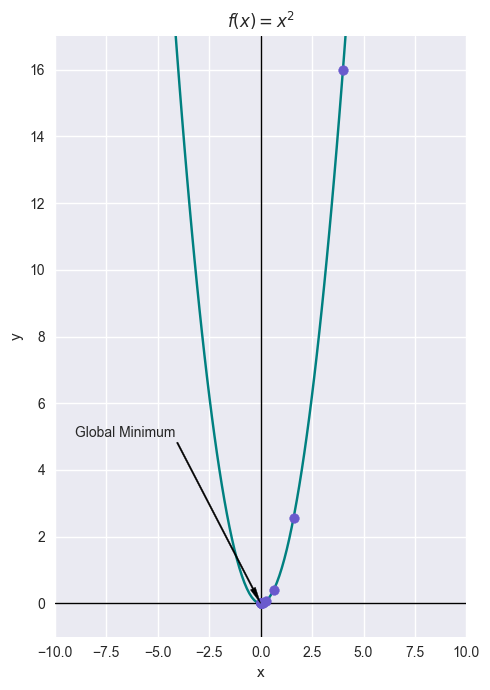

In [11]:
fig, ax = plt.subplots(figsize=(5,7))
ax.plot(x,f(x), color = 'teal')
ax.scatter(grad['X_n'],f(grad['X_n']), color = 'slateblue', zorder = 3)
ax.annotate('Global Minimum', xy = (0, 0), xytext = (-9,5), arrowprops = dict(width = 1, headwidth = 4, facecolor = 'black'))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$f(x)=x^2$')
ax.axvline(color='black', linewidth = 1)
ax.axhline(color='black', linewidth = 1)
ax.set_xlim(-10,10)
ax.set_ylim(-1,17)
plt.tight_layout()
plt.show()
fig.savefig('./images/de_grad_comp.png')

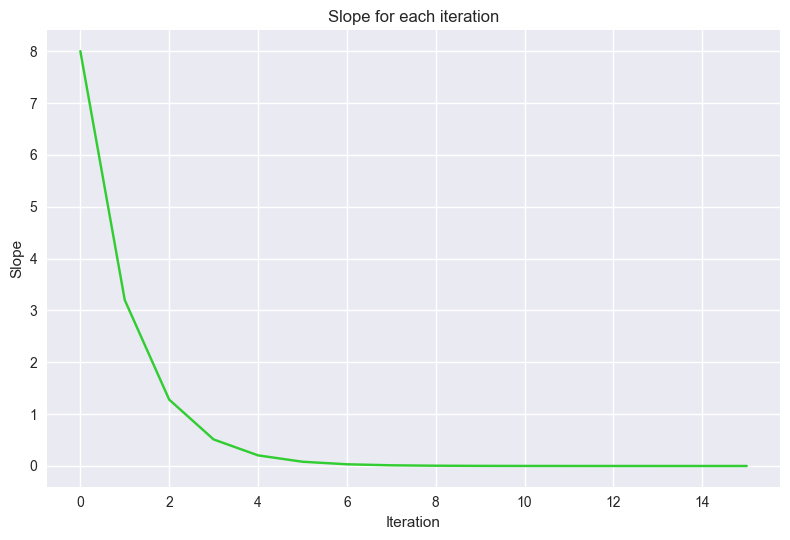

In [12]:
fig, ax = plt.subplots()
ax.plot(range(grad.shape[0]), grad['m'], color = 'limegreen')
ax.set_xlabel('Iteration')
ax.set_ylabel('Slope')
ax.set_title('Slope for each iteration')
fig.tight_layout()
fig.savefig('slope_iter.png')

In [23]:
grad_lr1_01 = gradient_descent(4,f,10,1.01)
grad_lr0_01 = gradient_descent(4,f,10,0.01)

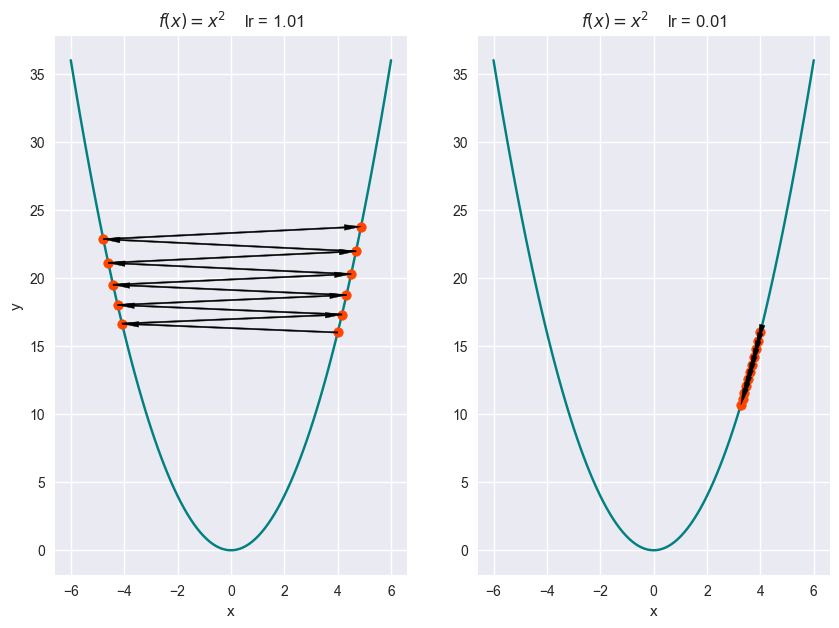

In [33]:
fig, ax = plt.subplots(ncols=2, figsize=(10,7))
ax[0].plot(x,f(x), color = 'teal')
ax[1].plot(x,f(x), color = 'teal')
ax[0].scatter(grad_lr1_01['X_n'], f(grad_lr1_01['X_n']), color = 'orangered', zorder = 2)
ax[1].scatter(grad_lr0_01['X_n'], f(grad_lr0_01['X_n']), color = 'orangered', zorder = 2)
for i in range(grad_lr1_01.shape[0] - 1):
    ax[0].annotate('', xy = (grad_lr1_01['X_n'][i + 1], f(grad_lr1_01['X_n'][i + 1])), xytext = (grad_lr1_01['X_n'][i],f(grad_lr1_01['X_n'][i])), arrowprops = dict(width = 1, headwidth = 4, facecolor = 'black'))
    ax[1].annotate('', xy = (grad_lr0_01['X_n'][i + 1], f(grad_lr0_01['X_n'][i + 1])), xytext = (grad_lr0_01['X_n'][i],f(grad_lr0_01['X_n'][i])), arrowprops = dict(width = 1, headwidth = 4, facecolor = 'black'))
ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title(f'$f(x)=x^2$    lr = {1.01}')
ax[1].set_title(f'$f(x)=x^2$    lr = {0.01}')
plt.show()
fig.savefig('./images/lr.png')